# EDA voitures électriques en France

In [1]:
# Nous avons besoins d'importer quelques modules 
import pandas as pd 
import numpy as np 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import folium
import seaborn as sns
import requests 
import re
import os
from datetime import datetime
import plotly.express as px
import time

## On commence par obtenir le rang des véhicules électriques les plus utilisés en France (2023)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


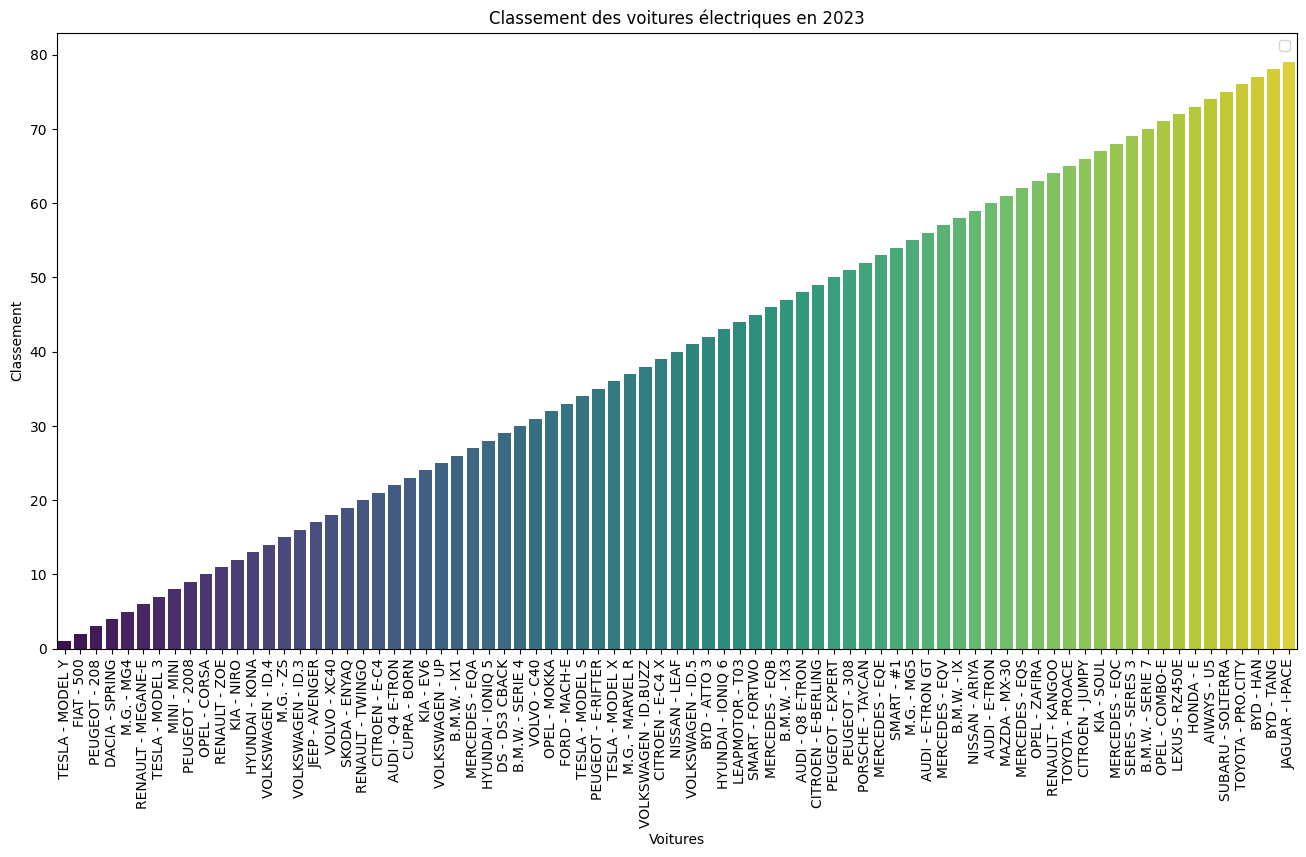

In [4]:
# classement des voitures électriques en 2023
os.chdir("/Users/augustincablant/Documents/GitHub/Pycar")
classement = pd.read_csv('SCRAP/classement_VE_2023.csv')
classement.sort_values(by = 'Classement', inplace = True)
plt.figure(figsize = (16,8))
sns.barplot(x='Voitures', y='Classement', data=classement, palette='viridis')
plt.title('Classement des voitures électriques en 2023')
plt.xlabel('Voitures')
plt.ylabel('Classement')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# classement.head()

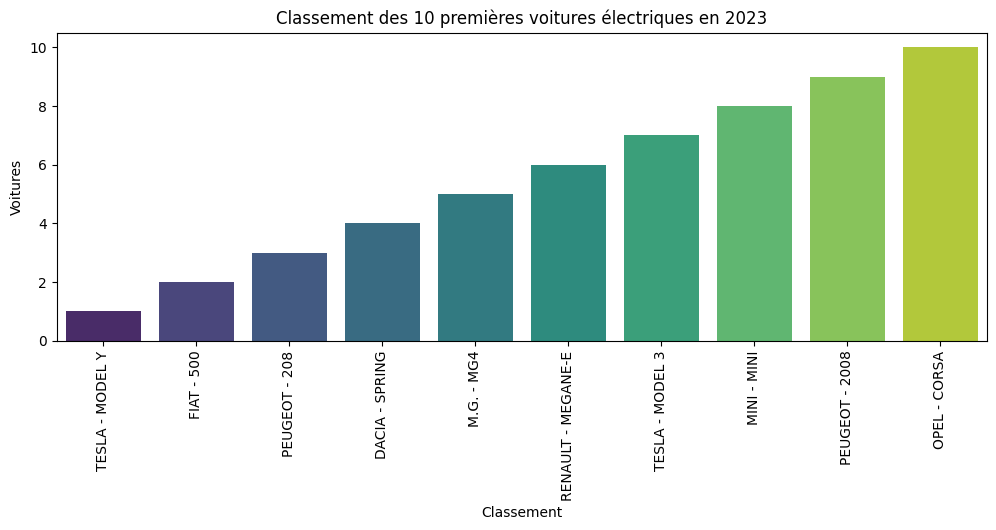

In [5]:
# Faire apparaître le top 10 
plt.figure(figsize=(12, 4))
sns.barplot(x='Voitures', y='Classement', data=classement[0:10], palette='viridis')
plt.title('Classement des 10 premières voitures électriques en 2023')
plt.xlabel('Classement')
plt.ylabel('Voitures')
plt.xticks(rotation = 90)
plt.show()

## On récupère l'autonomie de ces véhicules 

In [6]:
autonomie = pd.read_csv('SCRAP/autonomie_VE.csv')
autonomie.drop_duplicates(subset = 'Voitures', inplace = True)
autonomie.head()

,Classement,Voitures,kWh,Prix,Autonomie
0,1.0,Mercedes EQS,108.0,135 850 €,783 km
1,2.0,Fisker Ocean,106.0,69 950 €,707 km
3,4.0,Volkswagen ID.7,86.0,NaN,700 km
4,4.0,Peugeot e-3008,98.0,NaN,700 km
6,7.0,Tesla Model 3,76.0,50 990 €,678 km


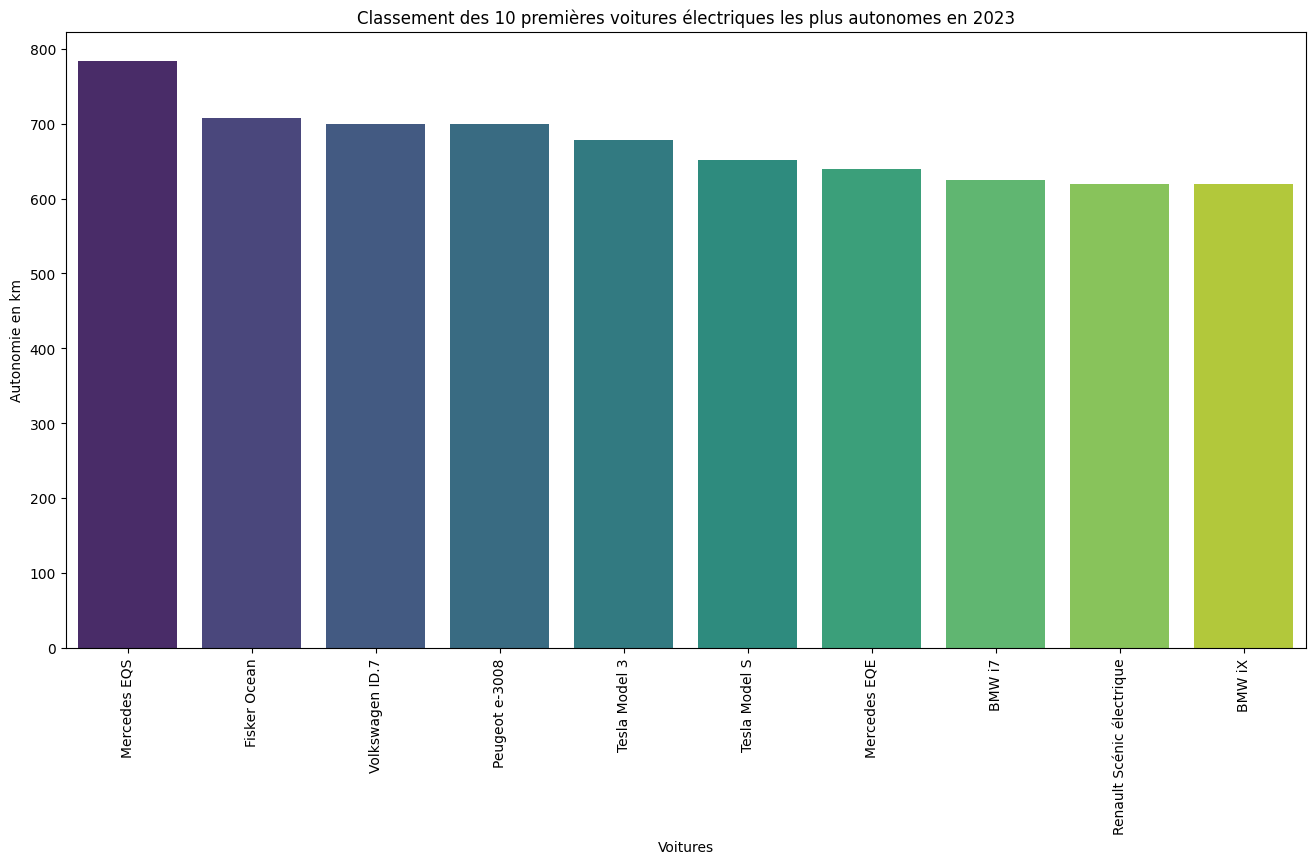

In [7]:
def get_km(row):
    if not pd.isna(row):
        return int(row.split(' ')[0])
    else:
        return row
autonomie['Autonomie_int'] = autonomie['Autonomie'].apply(get_km)
autonomie.sort_values(by = 'Autonomie_int', ascending = False, inplace = True)

plt.figure(figsize=(16, 8))
sns.barplot(x='Voitures', y='Autonomie_int', data=autonomie[0:10], palette='viridis')
plt.title('Classement des 10 premières voitures électriques les plus autonomes en 2023')
plt.xlabel('Voitures')
plt.ylabel('Autonomie en km')
plt.xticks(rotation = 90)
plt.show()

## Évolution des voitures électriques :

In [8]:
os.chdir("/Users/augustincablant/Documents/GitHub/Projet_python_2A")
def evolution_nbre_voiture_elec():
    df = pd.read_csv('download/Voitures.csv', sep=';')
    List_date = []
    List_nombre = []

    for row in df.itertuples():
        date0 = row.date_arrete
        date = datetime.strptime(date0, "%d/%m/%Y").strftime("%Y-%m-%d")
        nbre = row.nb_vp_rechargeables_el
        if date in List_date:
            for i in range(len(List_date)):
                if List_date[i] == date:
                    List_nombre[i] += nbre
        else:
            List_date.append(date)
            List_nombre.append(nbre)

    dict = {'Date': List_date, 'Nombre': List_nombre}

    dataframe = pd.DataFrame(dict)
    df0 = dataframe.sort_values('Date')
    fig = px.line(df0, x='Date', y='Nombre',
                  title='Evolution du parc de véhicules électriques en France')
    return fig
evolution_nbre_voiture_elec()